### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8.7,6.27)})
import warnings
warnings.filterwarnings('ignore')

### Get the Data

In [2]:
df=pd.read_csv(r'E:\DATASETS\loan status.csv')

### Understand the Dataset

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

### Information about the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Check Null Values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Data Cleaning

### Handle the missing Values

In [8]:
# In this Dataset have Very Less Amount of Data(614). 
# If We Drop the Missing Values, We are Lossing the More Information about the Data.
# So, We Try to Filling the Missing Values.

In [9]:
# Gender
df['Gender'].mode()
df['Gender'].fillna('Male',inplace=True)
df['Gender'].isnull().sum()

0

In [10]:
# Married
df['Married'].mode()
df['Married'].fillna('Yes',inplace=True)
df['Married'].isnull().sum()

0

In [11]:
# Dependents
df['Dependents'].mode()
df['Dependents'].fillna('0',inplace=True)
df['Dependents'].isnull().sum()

0

In [12]:
# Self Employed
df['Self_Employed'].mode()
df['Self_Employed'].fillna('No',inplace=True)
df['Self_Employed'].isnull().sum()

0

<AxesSubplot:xlabel='LoanAmount'>

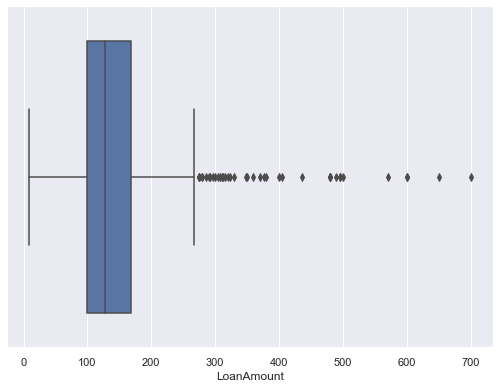

In [13]:
#Loan Amount - 22 Missing Values
sns.boxplot(df['LoanAmount'])

In [14]:
# Loan Amount Feature have More Outliers.
# If No of Outliers in the Dataset, We can go with Median or Z-Score Method  
# So, Now We can Dandle the Missing Values using Median

df['LoanAmount'].median() 
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [15]:
# Loan Amount Term - 14 Missing Values
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
df['Loan_Amount_Term'].mode()
df['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [17]:
# Credit History - 50 Missing Values
df['Credit_History'].mode()
df['Credit_History'].fillna(1.0,inplace=True)

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
# Drop the Loan_ID Column
df.drop(columns=['Loan_ID'],inplace=True,axis=1)

### Drop the Duplicate Values

In [21]:
df.drop_duplicates(inplace=True)

### EDA

In [22]:
# Check this Dataset is Balance or Imbalance
Target_value=df['Loan_Status'].value_counts()
print('Class Y :', Target_value['Y'])
print('Class N :', Target_value['N'])
class_y=round(Target_value['Y']*100/(Target_value['Y']+Target_value['N']))
print('Class Y Values in Percentage :',class_y)
print('Class N Values in Percentage :',100-class_y)

Class Y : 422
Class N : 192
Class Y Values in Percentage : 69
Class N Values in Percentage : 31


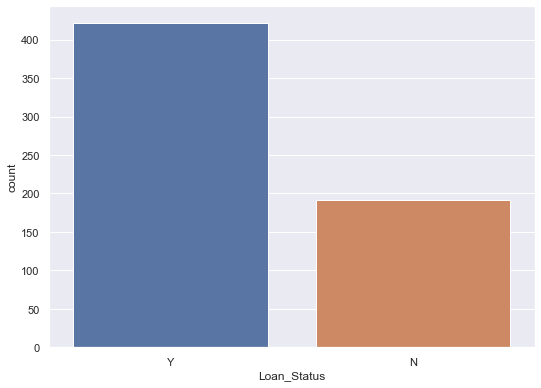

In [23]:
# It's Slightly Imbalance Dataset
sns.countplot(df['Loan_Status'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

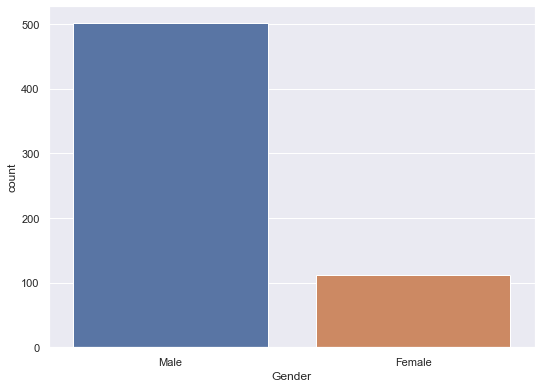

In [24]:
# Gender
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

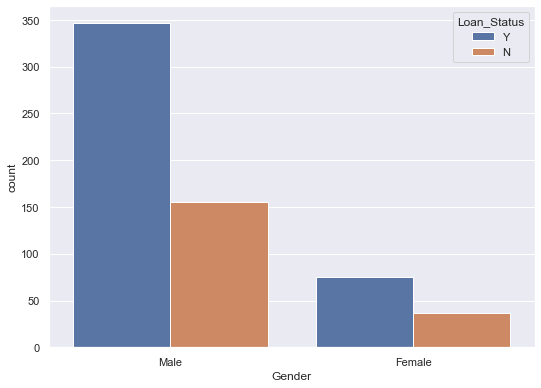

In [25]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Married', ylabel='count'>

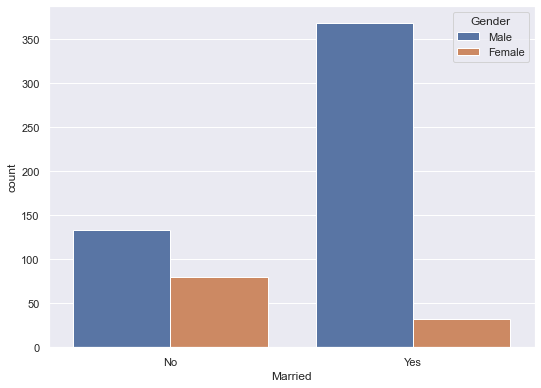

In [26]:
sns.countplot(df['Married'],hue=df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

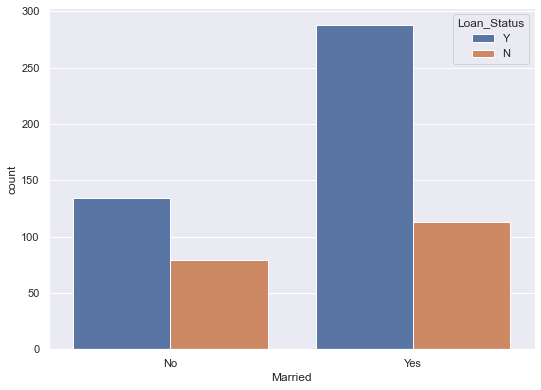

In [27]:
sns.countplot(df['Married'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

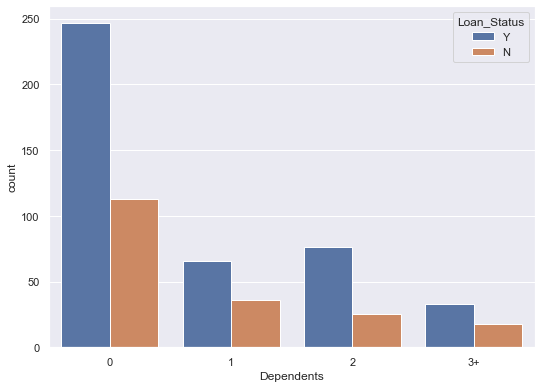

In [28]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

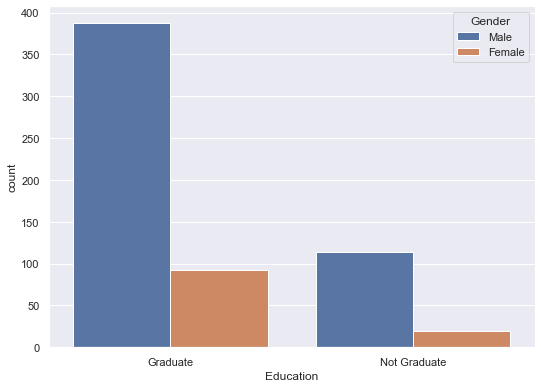

In [29]:
sns.countplot(df['Education'],hue=df['Gender'])

<AxesSubplot:xlabel='Education', ylabel='count'>

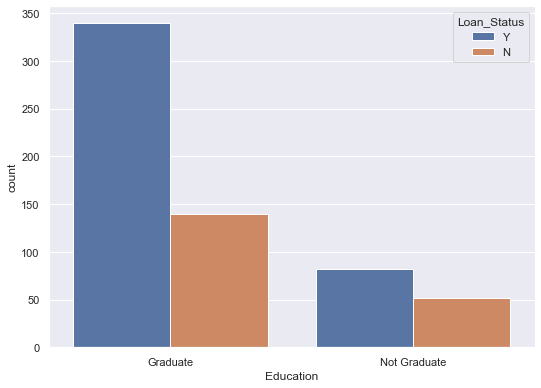

In [30]:
sns.countplot(df['Education'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

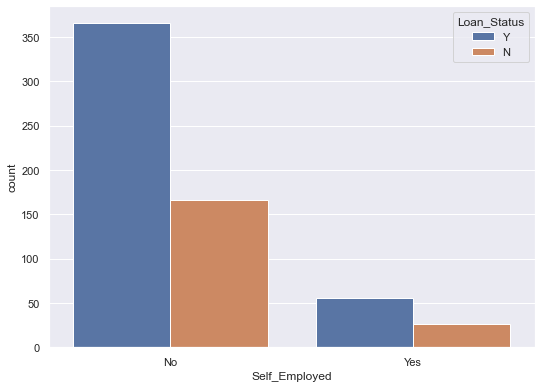

In [31]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome'>

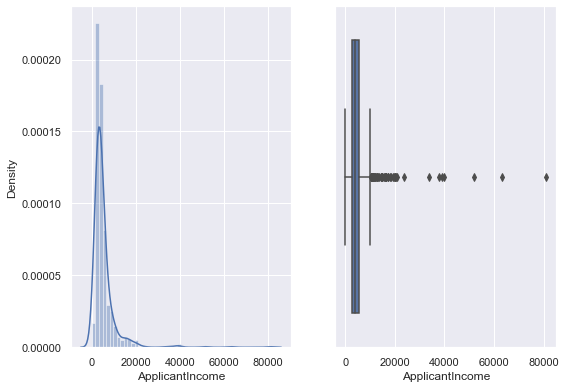

In [32]:
fig, axs = plt.subplots(ncols=2)
sns.distplot(df['ApplicantIncome'],ax=axs[0])
sns.boxplot(df['ApplicantIncome'],ax=axs[1])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

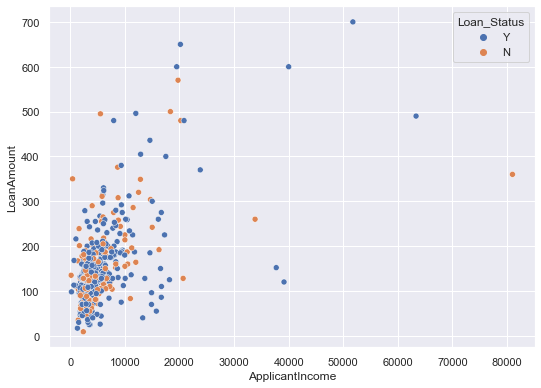

In [33]:
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='CoapplicantIncome'>

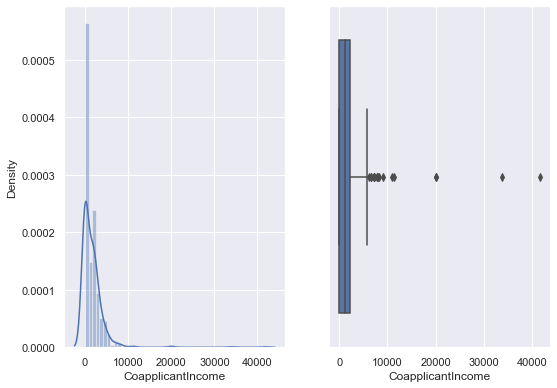

In [34]:
fig, axs = plt.subplots(ncols=2)
sns.distplot(df['CoapplicantIncome'],ax=axs[0])
sns.boxplot(df['CoapplicantIncome'],ax=axs[1])

<AxesSubplot:xlabel='LoanAmount'>

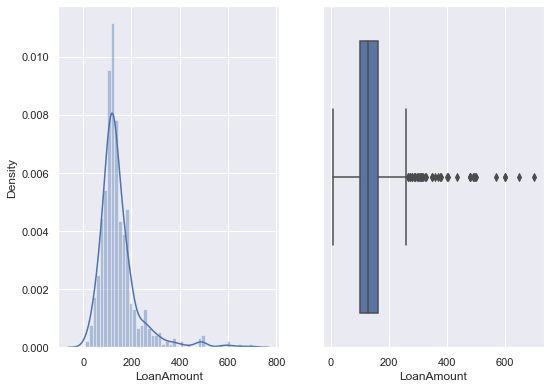

In [35]:
fig, axs = plt.subplots(ncols=2)
sns.distplot(df['LoanAmount'],ax=axs[0])
sns.boxplot(df['LoanAmount'],ax=axs[1])

<AxesSubplot:xlabel='Loan_Amount_Term'>

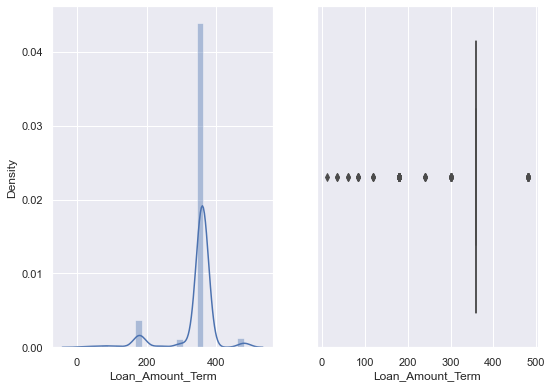

In [36]:
fig, axs = plt.subplots(ncols=2)
sns.distplot(df['Loan_Amount_Term'],ax=axs[0])
sns.boxplot(df['Loan_Amount_Term'],ax=axs[1])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

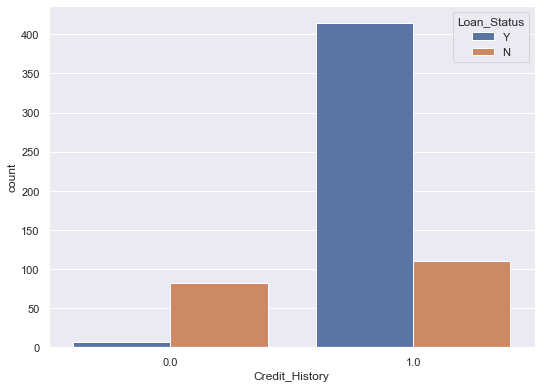

In [37]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

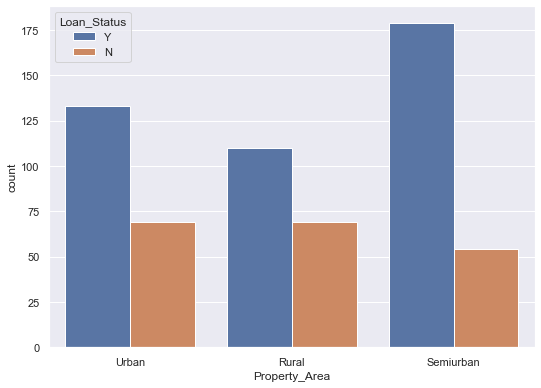

In [38]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

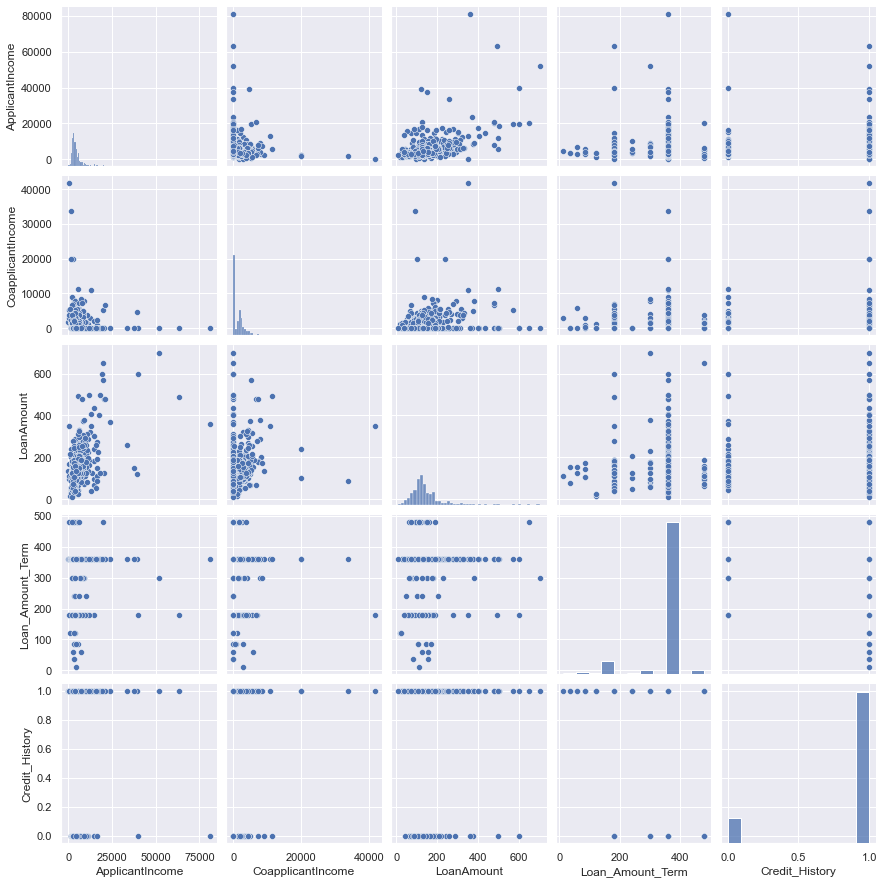

In [39]:
sns.pairplot(df)

<AxesSubplot:>

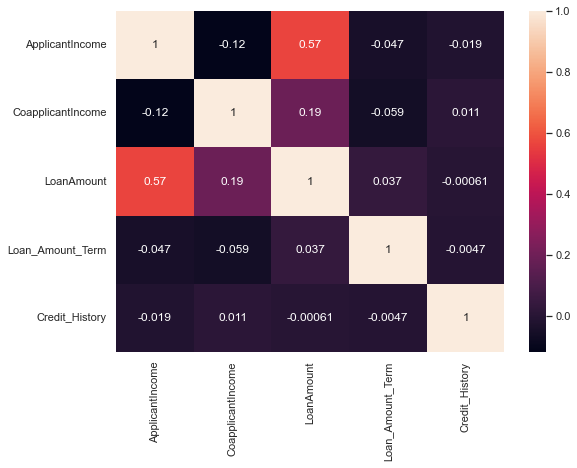

In [40]:
sns.heatmap(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr(),annot=True)

### Handle the Outliers

In [41]:
# 1.Applicant Income
# 2.Coapplicant Income
# 3.Loan Amount

Q1         : 2877.5
Median     : 3812.5
Q3         : 5795.0
IQR        : 2917.5
LowerBound : -1498.75
UpperBound : 10171.25


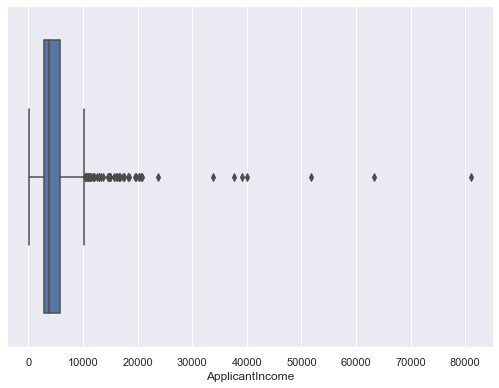

In [42]:
## Applicant Income
# Q1
# Median
# Q3
# IQR
sns.boxplot(df['ApplicantIncome'])
q1=np.quantile(df['ApplicantIncome'],q=0.25)
q3=np.quantile(df['ApplicantIncome'],q=0.75)
median=np.median(df['ApplicantIncome'])
iqr=q3-q1
lowerbound=q1-(1.5*iqr)
upperbound=q3+(1.5*iqr)
print('Q1         :',q1)
print('Median     :',median)
print('Q3         :',q3)
print('IQR        :',iqr)
print('LowerBound :',lowerbound)
print('UpperBound :',upperbound)

In [43]:
applicant=[]
for i in df['ApplicantIncome']:
    if i>upperbound:
        applicant.append(upperbound)
    else:
        applicant.append(i)
df['New_ApplicantIncome']=applicant

<AxesSubplot:xlabel='New_ApplicantIncome'>

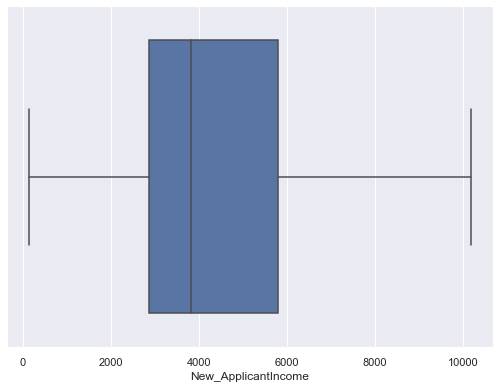

In [44]:
sns.boxplot(df['New_ApplicantIncome'])

Q1         : 0.0
Median     : 1188.5
Q3         : 2297.25
IQR        : 2297.25
LowerBound : -3445.875
UpperBound : 5743.125


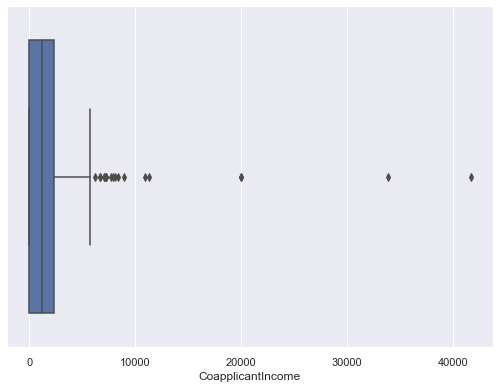

In [45]:
# 2.Coapplicant Income
sns.boxplot(df['CoapplicantIncome'])
q1=np.quantile(df['CoapplicantIncome'],q=0.25)
q3=np.quantile(df['CoapplicantIncome'],q=0.75)
median=np.median(df['CoapplicantIncome'])
iqr=q3-q1
lowerbound=q1-(1.5*iqr)
upperbound=q3+(1.5*iqr)
print('Q1         :',q1)
print('Median     :',median)
print('Q3         :',q3)
print('IQR        :',iqr)
print('LowerBound :',lowerbound)
print('UpperBound :',upperbound)

In [46]:
coapplicant=[]
for i in df['CoapplicantIncome']:
    if i>upperbound:
        coapplicant.append(upperbound)
    else:
        coapplicant.append(i)
df['New_CopplicantIncome']=coapplicant

<AxesSubplot:xlabel='New_CopplicantIncome'>

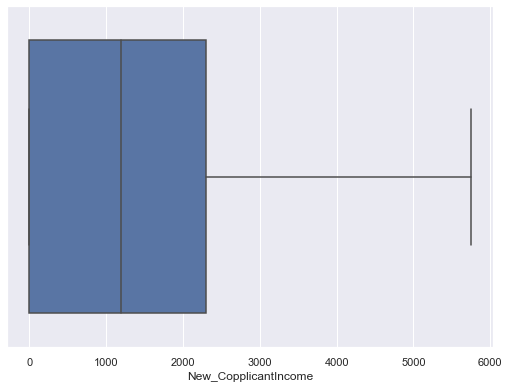

In [47]:
sns.boxplot(df['New_CopplicantIncome'])

Q1         : 100.25
Median     : 128.0
Q3         : 164.75
IQR        : 64.5
LowerBound : 3.5
UpperBound : 261.5


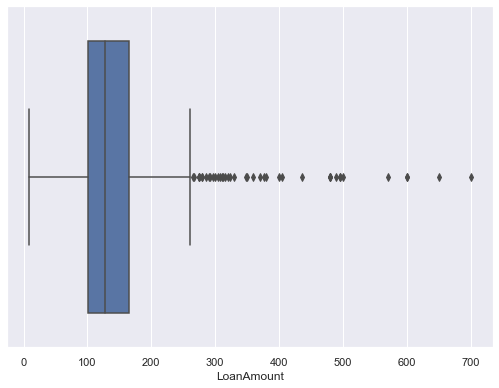

In [48]:
# 3.Loan Amount
sns.boxplot(df['LoanAmount'])
q1=np.quantile(df['LoanAmount'],q=0.25)
q3=np.quantile(df['LoanAmount'],q=0.75)
median=np.median(df['LoanAmount'])
iqr=q3-q1
lowerbound=q1-(1.5*iqr)
upperbound=q3+(1.5*iqr)
print('Q1         :',q1)
print('Median     :',median)
print('Q3         :',q3)
print('IQR        :',iqr)
print('LowerBound :',lowerbound)
print('UpperBound :',upperbound)

In [49]:
loanamt=[]
for i in df['LoanAmount']:
    if i>upperbound:
        loanamt.append(upperbound)
    else:
        loanamt.append(i)
df['New_LoanAmount']=loanamt

<AxesSubplot:xlabel='New_LoanAmount'>

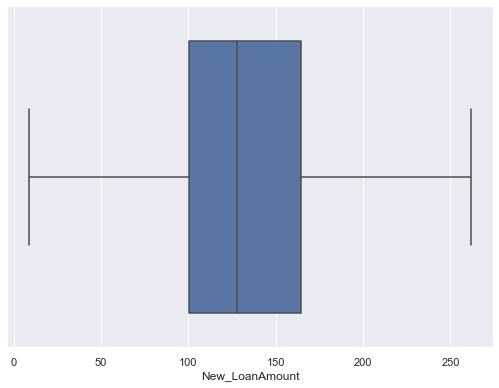

In [50]:
sns.boxplot(df['New_LoanAmount'])

### Encoding the Categorical Features

In [51]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'New_ApplicantIncome', 'New_CopplicantIncome', 'New_LoanAmount'],
      dtype='object')

In [52]:
# 1. Gender
# 2. Married
# 3. Dependents
# 4. Education
# 5. Selfemployed
# 6. Property area
# 7. Loan Status

In [53]:
## 1. Gender
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
## 2. Married
df['Married']=df['Married'].map({'Yes':1,'No':0})
## 3. Dependents
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
## 4. Education
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
## 5. Self Employed
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
## 6. Property Area
df['Property_Area']=df['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})
## 7. Loan Status
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int64  
 1   Married               614 non-null    int64  
 2   Dependents            614 non-null    int64  
 3   Education             614 non-null    int64  
 4   Self_Employed         614 non-null    int64  
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            614 non-null    float64
 8   Loan_Amount_Term      614 non-null    float64
 9   Credit_History        614 non-null    float64
 10  Property_Area         614 non-null    int64  
 11  Loan_Status           614 non-null    int64  
 12  New_ApplicantIncome   614 non-null    float64
 13  New_CopplicantIncome  614 non-null    float64
 14  New_LoanAmount        614 non-null    float64
dtypes: float64(7), int64(8)

In [54]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,New_ApplicantIncome,New_CopplicantIncome,New_LoanAmount
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1,5849.0,0.0,128.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0,4583.0,1508.0,128.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1,3000.0,0.0,66.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,2583.0,2358.0,120.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,6000.0,0.0,141.0


### Split the Data

In [55]:
x=np.array(df[['Gender','Married','Dependents','Education','Self_Employed','New_ApplicantIncome','New_CopplicantIncome','New_LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']])
y=np.array(df['Loan_Status'])

### Imbalance to Balance the Dataset

### SMOTE

In [156]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

### Train, Test, Split

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3)

In [158]:
print('x train :',x_train.shape)
print('x test :',x_test.shape)
print('y train :',y_train.shape)
print('y test :',y_test.shape)

x train : (590, 11)
x test : (254, 11)
y train : (590,)
y test : (254,)


### Feature Scaling

In [159]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

### Create the Model

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,roc_auc_score

### Logistic Regression

In [161]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [162]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F1-Score :',f1_score(y_test,y_pred))
print('ROC & AUC :',roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1]))

Accuracy : 0.7165354330708661
F1-Score : 0.7428571428571428
ROC & AUC : 0.8054433604672839


In [163]:
print(confusion_matrix(y_test,y_pred))

[[ 78  55]
 [ 17 104]]


In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.59      0.68       133
           1       0.65      0.86      0.74       121

    accuracy                           0.72       254
   macro avg       0.74      0.72      0.71       254
weighted avg       0.74      0.72      0.71       254



### Decision Tree

In [165]:
model=DecisionTreeClassifier(max_depth=6)
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [166]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F1-Score :',f1_score(y_test,y_pred))
print('ROC & AUC :',roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1]))

Accuracy : 0.8267716535433071
F1-Score : 0.8394160583941604
ROC & AUC : 0.866650096315168


In [167]:
print(confusion_matrix(y_test,y_pred))

[[ 95  38]
 [  6 115]]


In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       133
           1       0.75      0.95      0.84       121

    accuracy                           0.83       254
   macro avg       0.85      0.83      0.83       254
weighted avg       0.85      0.83      0.83       254



### Random Forest

In [169]:
model=RandomForestClassifier(n_estimators=200,max_depth=3)
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [170]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F1-Score :',f1_score(y_test,y_pred))
print('ROC & AUC :',roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1]))

Accuracy : 0.8464566929133859
F1-Score : 0.8612099644128113
ROC & AUC : 0.8897968060647486


In [171]:
print(confusion_matrix(y_test,y_pred))

[[ 94  39]
 [  0 121]]


In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       133
           1       0.76      1.00      0.86       121

    accuracy                           0.85       254
   macro avg       0.88      0.85      0.84       254
weighted avg       0.88      0.85      0.84       254



### KNN

In [173]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [174]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F1-Score :',f1_score(y_test,y_pred))
print('ROC & AUC :',roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1]))

Accuracy : 0.8110236220472441
F1-Score : 0.8079999999999999
ROC & AUC : 0.8591934381408065


In [175]:
print(confusion_matrix(y_test,y_pred))

[[105  28]
 [ 20 101]]


### SVM

In [176]:
model=SVC(kernel='rbf')
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [177]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F1-Score :',f1_score(y_test,y_pred))
print('ROC & AUC :',roc_auc_score(y_test,y_pred))

Accuracy : 0.7874015748031497
F1-Score : 0.8137931034482758
ROC & AUC : 0.7958739824768533


In [178]:
print(confusion_matrix(y_test,y_pred))

[[ 82  51]
 [  3 118]]


### Adaboost

In [179]:
model=AdaBoostClassifier()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [180]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F1-Score :',f1_score(y_test,y_pred))
print('ROC & AUC :',roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1]))

Accuracy : 0.84251968503937
F1-Score : 0.8529411764705883
ROC & AUC : 0.8699434536755111


In [181]:
print(confusion_matrix(y_test,y_pred))

[[ 98  35]
 [  5 116]]


### Gradient Boost

In [182]:
model=GradientBoostingClassifier()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [183]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F1-Score :',f1_score(y_test,y_pred))
print('ROC & AUC :',roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1]))

Accuracy : 0.8464566929133859
F1-Score : 0.8539325842696629
ROC & AUC : 0.8878083638849189


In [184]:
print(confusion_matrix(y_test,y_pred))

[[101  32]
 [  7 114]]


### XG Boost

In [245]:
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F1-Score :',f1_score(y_test,y_pred))
print('ROC & AUC :',roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1]))

Accuracy : 0.8622047244094488
F1-Score : 0.8627450980392157
ROC & AUC : 0.9114521841794568


In [246]:
print(confusion_matrix(y_test,y_pred))

[[109  24]
 [ 11 110]]


In [247]:
value=scaler.transform(np.array([1,1,2,0,0,2889,0,45,180,0,3]).reshape(1,-1))
model.predict(np.array(value))

array([0])

In [248]:
value=scaler.transform(np.array([1,1,0,1,1,3000,110,145,360,1.0,1]).reshape(1,-1))
model.predict(np.array(value))

array([1])

### Hyperparameter Tuning

### XGBoost

In [249]:
model=XGBClassifier(eta=0.2,max_depth=6)
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
print('Accuracy :',accuracy_score(y_test,y_pred))
print('F1-Score :',f1_score(y_test,y_pred))
print('ROC & AUC :',roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1]))

Accuracy : 0.8503937007874016
F1-Score : 0.8527131782945736
ROC & AUC : 0.9147455415397999


In [250]:
print(confusion_matrix(y_test,y_pred))

[[106  27]
 [ 11 110]]


### Pickle the Model

In [251]:
import pickle

In [252]:
scale=pickle.dump(scaler,open('scaled_feature.pkl','wb'))
xgb=pickle.dump(model,open('model.pkl','wb'))

In [265]:
list(df['Gender'].unique())

[1, 0]